In [12]:
# 포폴에도 Seaborn 쓴거 있어야 해요
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
study = pd.read_csv("../../Data/study/2007~2022유치원_대학_사설학원.csv",index_col=0)
study

,시점,지역,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자
0,2007,경기도,15591,61,489548,951908,411732,135245,485552
1,2007,서울특별시,11549,50,375937,665227,355193,82461,541288
2,2007,경상남도,5844,19,138629,264776,137276,44188,139584
3,2007,부산광역시,4779,22,144991,242193,106501,37921,265238
4,2007,대구광역시,2929,11,113962,199471,105396,27908,124318
...,...,...,...,...,...,...,...,...,...
267,2022,충청북도,2381,17,42601,83827,39153,14993,107511
268,2022,대전광역시,2294,15,40303,76960,39112,20405,123835
269,2022,강원도,2264,17,37922,71530,36821,13168,104253
270,2022,제주특별자치도,1167,4,20126,41628,18093,5945,25964


In [84]:
pop = pd.read_csv("../../Data/people/주민등록인구.csv", encoding="euc-kr")
pop

,시점,행정구역별,남 (명),여 (명)
0,2010,서울특별시,5111259,5201286
1,2010,부산광역시,1773170,1794740
2,2010,대구광역시,1255245,1256431
3,2010,인천광역시,1390356,1367940
4,2010,광주광역시,721780,732856
...,...,...,...,...
216,2022,전라북도,880592,889015
217,2022,전라남도,915272,902425
218,2022,경상북도,1311881,1288611
219,2022,경상남도,1651675,1628818


In [8]:
study10 = study[study['시점']>2009]
study10

,시점,지역,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자
51,2010,경기도,18146,62,482170,848135,461461,141626,502722
52,2010,서울특별시,13168,49,345413,566149,362466,78789,553674
53,2010,경상남도,6291,20,135600,227813,136665,43958,129357
54,2010,부산광역시,4860,22,129285,197397,113247,36433,274946
55,2010,대구광역시,3910,11,108082,167548,109300,27178,125759
...,...,...,...,...,...,...,...,...,...
267,2022,충청북도,2381,17,42601,83827,39153,14993,107511
268,2022,대전광역시,2294,15,40303,76960,39112,20405,123835
269,2022,강원도,2264,17,37922,71530,36821,13168,104253
270,2022,제주특별자치도,1167,4,20126,41628,18093,5945,25964


In [34]:
pop.columns

Index(['시점', '행정구역별', '남 (명)', '여 (명)'], dtype='object')

In [62]:
pop[pop['행정구역별']=='세종특별자치시']
del pop['총인구']

In [85]:
pop.replace("-",0,inplace=True)

In [86]:
pops = pop.iloc[:,2:].astype(int)

In [87]:
pops

,남 (명),여 (명)
0,5111259,5201286
1,1773170,1794740
2,1255245,1256431
3,1390356,1367940
4,721780,732856
...,...,...
216,880592,889015
217,915272,902425
218,1311881,1288611
219,1651675,1628818


In [88]:
pops['총인구수'] = pops['남 (명)'] + pops['여 (명)'] 
pops
# train["FamilySize"] = train.SibSp + train.Parch + 1

,남 (명),여 (명),총인구수
0,5111259,5201286,10312545
1,1773170,1794740,3567910
2,1255245,1256431,2511676
3,1390356,1367940,2758296
4,721780,732856,1454636
...,...,...,...
216,880592,889015,1769607
217,915272,902425,1817697
218,1311881,1288611,2600492
219,1651675,1628818,3280493


In [90]:
pops['시점'] = pop.시점
pops['행정구역별'] = pop.행정구역별
pops

,남 (명),여 (명),총인구수,시점,행정구역별
0,5111259,5201286,10312545,2010,서울특별시
1,1773170,1794740,3567910,2010,부산광역시
2,1255245,1256431,2511676,2010,대구광역시
3,1390356,1367940,2758296,2010,인천광역시
4,721780,732856,1454636,2010,광주광역시
...,...,...,...,...,...
216,880592,889015,1769607,2022,전라북도
217,915272,902425,1817697,2022,전라남도
218,1311881,1288611,2600492,2022,경상북도
219,1651675,1628818,3280493,2022,경상남도


In [95]:
popin = pops.iloc[:,[3,4,2]]
popin

,시점,행정구역별,총인구수
0,2010,서울특별시,10312545
1,2010,부산광역시,3567910
2,2010,대구광역시,2511676
3,2010,인천광역시,2758296
4,2010,광주광역시,1454636
...,...,...,...
216,2022,전라북도,1769607
217,2022,전라남도,1817697
218,2022,경상북도,2600492
219,2022,경상남도,3280493


In [98]:
popin.rename(columns={"행정구역별":"지역"},inplace=True)
popin

,시점,지역,총인구수
0,2010,서울특별시,10312545
1,2010,부산광역시,3567910
2,2010,대구광역시,2511676
3,2010,인천광역시,2758296
4,2010,광주광역시,1454636
...,...,...,...
216,2022,전라북도,1769607
217,2022,전라남도,1817697
218,2022,경상북도,2600492
219,2022,경상남도,3280493


In [99]:
test1 = pd.merge(popin,study10,on=["시점","지역"])
test1

,시점,지역,총인구수,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자
0,2010,서울특별시,10312545,13168,49,345413,566149,362466,78789,553674
1,2010,부산광역시,3567910,4860,22,129285,197397,113247,36433,274946
2,2010,대구광역시,2511676,3910,11,108082,167548,109300,27178,125759
3,2010,인천광역시,2758296,2924,8,112142,183261,130009,32521,78511
4,2010,광주광역시,1454636,2476,16,70352,115827,67750,17165,117771
...,...,...,...,...,...,...,...,...,...,...
216,2022,전라북도,1769607,3961,18,49084,91290,48265,18740,108118
217,2022,전라남도,1817697,2752,19,46826,90238,56081,16285,61761
218,2022,경상북도,2600492,3645,33,63810,127385,62986,31365,171561
219,2022,경상남도,3280493,6205,20,95037,187423,70161,42385,94829


In [102]:
test1.set_index("시점",inplace=True)

KeyError: "None of ['시점'] are in the columns"

In [117]:
test1.iloc[:,2:]

,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자
시점,,,,,,,
2010,13168,49,345413,566149,362466,78789,553674
2010,4860,22,129285,197397,113247,36433,274946
2010,3910,11,108082,167548,109300,27178,125759
2010,2924,8,112142,183261,130009,32521,78511
2010,2476,16,70352,115827,67750,17165,117771
...,...,...,...,...,...,...,...
2022,3961,18,49084,91290,48265,18740,108118
2022,2752,19,46826,90238,56081,16285,61761
2022,3645,33,63810,127385,62986,31365,171561


In [120]:
test1.iloc[:,1:].corr()

,총인구수,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자
총인구수,1.000000,0.988936,0.904462,0.967500,0.981279,0.970749,0.953080,0.901355
사설학원수,0.988936,1.000000,0.897172,0.959548,0.981247,0.955337,0.960315,0.863279
대학교_숫자,0.904462,0.897172,1.000000,0.880122,0.888065,0.875642,0.859785,0.916227
중학생인원수변화,0.967500,0.959548,0.880122,1.000000,0.989310,0.991933,0.952369,0.854101
초등학생인원수변화,0.981279,0.981247,0.888065,0.989310,1.000000,0.980986,0.971889,0.844510
고등학생인원수변화,0.970749,0.955337,0.875642,0.991933,0.980986,1.000000,0.952911,0.862681
유치원원아수변화,0.953080,0.960315,0.859785,0.952369,0.971889,0.952911,1.000000,0.790390
대학생숫자,0.901355,0.863279,0.916227,0.854101,0.844510,0.862681,0.790390,1.000000


In [121]:
from sklearn import preprocessing
col = ['총인구수','사설학원수','대학교_숫자','중학생인원수변화','초등학생인원수변화','고등학생인원수변화','유치원원아수변화','대학생숫자']

In [122]:
x = test1[col].values
# 최대값과 최소값 가져오기 instance
min_max_scaler = preprocessing.MinMaxScaler()
x_scaler= min_max_scaler.fit_transform(x.astype(float))
x_scaler

array([[0.75886505, 0.56704849, 0.77777778, ..., 0.78372722, 0.4007212 ,
        0.9617004 ],
       [0.26255034, 0.2092843 , 0.34920635, ..., 0.24486367, 0.1852984 ,
        0.47756564],
       [0.18482568, 0.16837482, 0.17460317, ..., 0.23632943, 0.13822743,
        0.21843626],
       ...,
       [0.19136135, 0.15696322, 0.52380952, ..., 0.13618889, 0.15952253,
        0.29799175],
       [0.2414003 , 0.26720351, 0.31746032, ..., 0.15170274, 0.21557029,
        0.16471261],
       [0.04990341, 0.05025407, 0.06349206, ..., 0.03912085, 0.0302363 ,
        0.045098  ]])

In [133]:
# 정규화된 범죄건수가 있는 데이터프레임 생성
study_pop = pd.DataFrame(x_scaler, columns=col, index=test1.index)
study_pop.corr()

,총인구수,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자
총인구수,1.000000,0.988936,0.904462,0.967500,0.981279,0.970749,0.953080,0.901355
사설학원수,0.988936,1.000000,0.897172,0.959548,0.981247,0.955337,0.960315,0.863279
대학교_숫자,0.904462,0.897172,1.000000,0.880122,0.888065,0.875642,0.859785,0.916227
중학생인원수변화,0.967500,0.959548,0.880122,1.000000,0.989310,0.991933,0.952369,0.854101
초등학생인원수변화,0.981279,0.981247,0.888065,0.989310,1.000000,0.980986,0.971889,0.844510
고등학생인원수변화,0.970749,0.955337,0.875642,0.991933,0.980986,1.000000,0.952911,0.862681
유치원원아수변화,0.953080,0.960315,0.859785,0.952369,0.971889,0.952911,1.000000,0.790390
대학생숫자,0.901355,0.863279,0.916227,0.854101,0.844510,0.862681,0.790390,1.000000


In [132]:
toto = study_pop.iloc[:,1:].corr()
toto

,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자
사설학원수,1.000000,0.897172,0.959548,0.981247,0.955337,0.960315,0.863279
대학교_숫자,0.897172,1.000000,0.880122,0.888065,0.875642,0.859785,0.916227
중학생인원수변화,0.959548,0.880122,1.000000,0.989310,0.991933,0.952369,0.854101
초등학생인원수변화,0.981247,0.888065,0.989310,1.000000,0.980986,0.971889,0.844510
고등학생인원수변화,0.955337,0.875642,0.991933,0.980986,1.000000,0.952911,0.862681
유치원원아수변화,0.960315,0.859785,0.952369,0.971889,0.952911,1.000000,0.790390
대학생숫자,0.863279,0.916227,0.854101,0.844510,0.862681,0.790390,1.000000


---
### 타겟과 상관관계

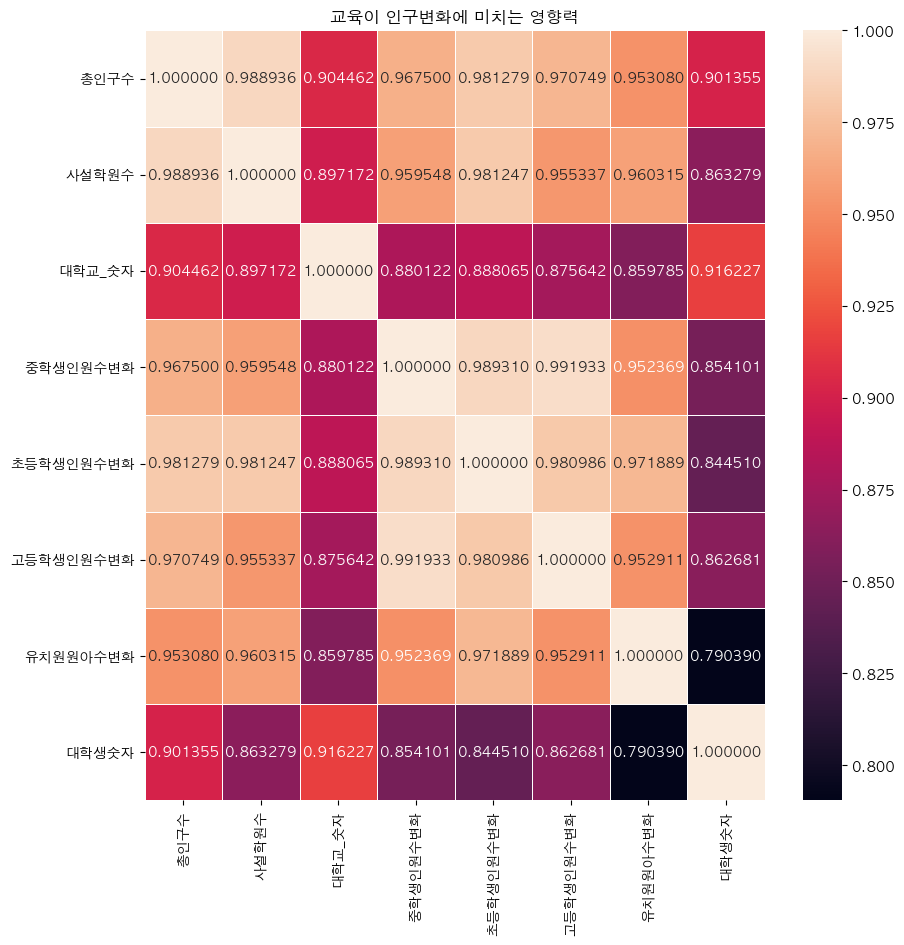

In [131]:
plt.figure(figsize=(10,10))
sns.heatmap(
    study_pop.corr(),
    annot= True,
    fmt= 'f',
    linewidths= 0.5,

)
plt.title("교육이 인구변화에 미치는 영향력")
plt.show()

---
### Feature 비교

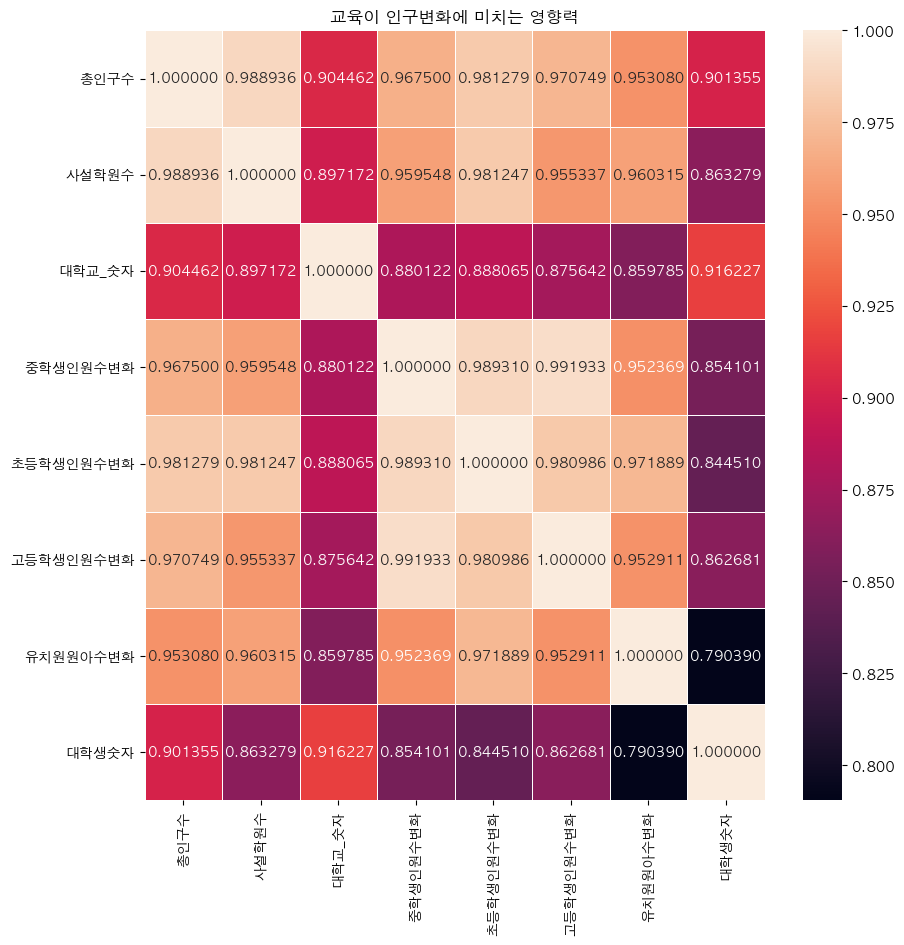

In [134]:
# target_col = ['총인구수', '사설학원수', '대학교_숫자', '중학생인원수변화', '초등학생인원수변화',
#        '고등학생인원수변화', '유치원원아수변화', '대학생숫자']
plt.figure(figsize=(10,10))
sns.heatmap(
    study_pop.corr(),
    annot= True,
    fmt= 'f',
    linewidths= 0.5,

)
plt.title("교육이 인구변화에 미치는 영향력")
plt.show()